In [16]:
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = False

In [17]:
tre_market_share = 0.164
swedish_population = 10e6
urban_stockholm_population = 1e6
total_bandwidth = 139.6e6
lost_bandwidth = 10e6
lost_bandwidth_percent = lost_bandwidth/total_bandwidth

In [18]:
#urban area (stockholm)
pop_per_km_sthlm = 5000
bytes_per_year = 3000000e12 * tre_market_share
average_kbit_sec_busyhour = bytes_per_year * 8 / (365 * 8 * 60 * 60 * 1000)
average_kbit_sec_busyhour_per_person = average_kbit_sec_busyhour / swedish_population
kbit_sqrkm_sthlm = pop_per_km_sthlm * average_kbit_sec_busyhour_per_person

In [62]:
#rural area
pop_per_km_rural = 20
kbit_sqrkm_rural = pop_per_km_rural * average_kbit_sec_busyhour_per_person

<BarContainer object of 1 artists>

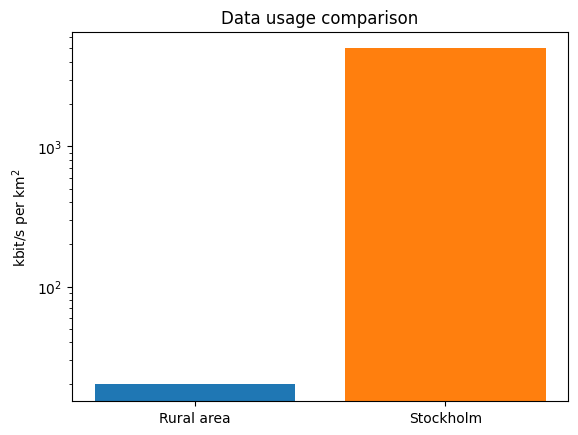

In [103]:
#plot
plt.title('Data usage comparison')
plt.yscale('log')
plt.ylabel(r'kbit/s per km$^2$')
plt.xticks(np.arange(2), ["Rural area", "Stockholm"])
plt.bar(0, pop_per_km_rural, label='Rural area')
plt.bar(1, pop_per_km_sthlm, label='Stockholm')

In [11]:
#spectral efficiency
#https://www.gsma.com/spectrum/wp-content/uploads/2019/06/Benefits-of-Technology-Neutral-Spectrum-Licences.pdf
efficiency3g = 0.8
efficiency4g = 1.9
efficiency5g = 2.84
efficiency3g_4g_mix = (efficiency3g * 0.5) + (efficiency4g * 0.5)

In [7]:
#----------Can moving from 3G to 4G/5G be sufficient in some cases? 
eight_hundred_band_percentage = 20/total_bandwidth
nine_hundred_band_percentage = 10/total_bandwidth
two_gig1_band_percentage = (19.8 * 2)/total_bandwidth
two_gig6_band_percentage = 70/total_bandwidth

<BarContainer object of 1 artists>

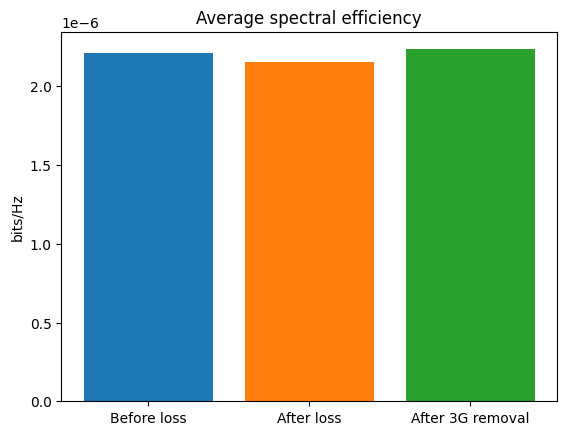

In [27]:
#-------------Plot capacity
total_spectral_eff_before = ((eight_hundred_band_percentage * efficiency3g_4g_mix) + 
                             (nine_hundred_band_percentage * efficiency3g) +
                            (two_gig1_band_percentage * efficiency4g) +
                            (two_gig6_band_percentage * efficiency5g))
total_spectral_eff_after_loss = ((eight_hundred_band_percentage * efficiency3g_4g_mix) + 
                            (two_gig1_band_percentage * efficiency4g) +
                            (two_gig6_band_percentage * efficiency5g))
total_spectral_eff_after_upgrade = ((eight_hundred_band_percentage * efficiency4g) + 
                            (two_gig1_band_percentage * efficiency4g) +
                            (two_gig6_band_percentage * efficiency5g))
#plot
plt.title('Average spectral efficiency')
#plt.yscale('log')
plt.ylabel('bits/Hz')
plt.xticks(np.arange(3), ["Before loss", "After loss", "After 3G removal"])
plt.bar(0, total_spectral_eff_before, label='Rural area')
plt.bar(1, total_spectral_eff_after_loss, label='Stockholm')
plt.bar(2, total_spectral_eff_after_upgrade, label='Stockholm')